导入库

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
from compareFragments import compareFragments

# 数据样本

## 读取音频

In [2]:
from pydub import AudioSegment

# 读取mp3文件
audio_file = AudioSegment.from_file("./手心的蔷薇.mp3", format="mp3")

# 获取采样率
sample_rate = audio_file.frame_rate

# 获取采样深度
sample_width = audio_file.sample_width

# 获取声道数
channels = audio_file.channels


# 打印文件信息
print("采样率：{0} Hz".format(sample_rate))
print("采样深度：{0} Bytes".format(sample_width))
print("声道数：{0}".format(channels))


采样率：44100 Hz
采样深度：2 Bytes
声道数：2


## 转换数组

如果直接对双声道的AudioSegment to_array的话，会将两个声道交替拼接成新数组返回，可以看作采样率翻倍

使用audio_file.split_to_mono()才是正确分离左右声道的方法

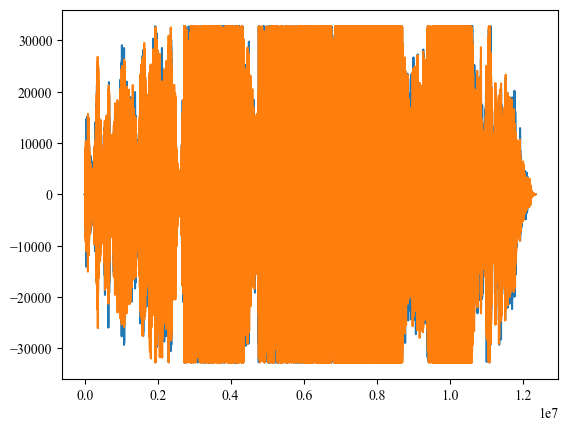

In [3]:
# 获取音频对象的左右声道(本程序中没有用，只是作为演示)
left = audio_file.split_to_mono()[0]
right = audio_file.split_to_mono()[1]
left_samples = np.array(left.get_array_of_samples())
right_samples = np.array(right.get_array_of_samples())
plt.plot(left_samples)
plt.plot(right_samples)

In [4]:
# 读取音频
samples = audio_file.get_array_of_samples()
print(len(samples))

# 剪切60s到65s的音频
sample_cut = samples[60 * sample_rate * 2:65 * sample_rate * 2]
sample_cut = np.array(sample_cut,dtype=np.int16)
print(len(sample_cut))

24701278
441000


## 数据可视化

441000


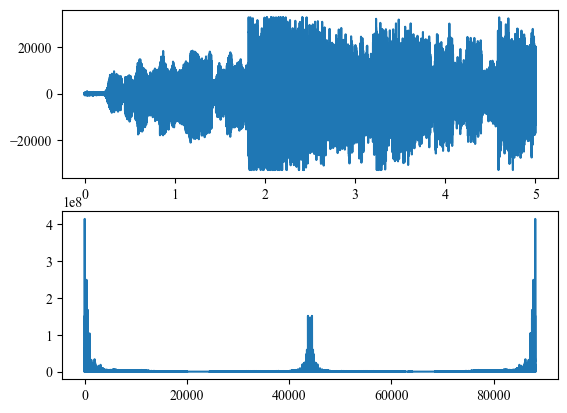

In [5]:
time = np.arange(0, len(sample_cut)) / (sample_rate*2)
print(len(time))
plt.subplot(2,1,1)
plt.plot(time,sample_cut)

fft_original = np.fft.fft(sample_cut)
freq = np.arange(0, len(fft_original)) / len(fft_original) * 2* sample_rate
plt.subplot(2,1,2)
plt.plot(freq,np.abs(fft_original))

Spectrogram

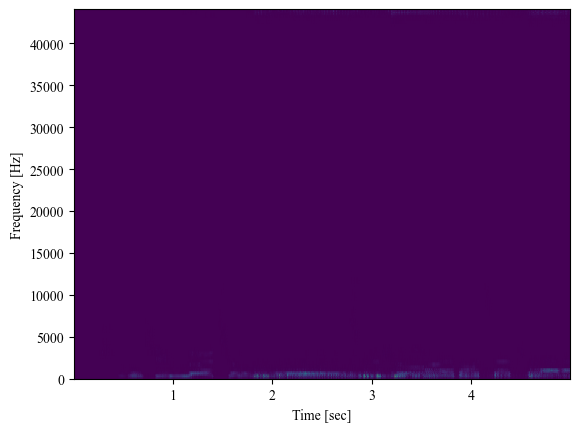

In [6]:
f, t, Sorg = sp.signal.spectrogram(sample_cut, 2*sample_rate)
plt.pcolormesh(t, f, Sorg, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

冷知识：人声的频率在100-10000Hz之间

## 播放测试

In [7]:
from pydub.playback import play

sound = AudioSegment(
    data=sample_cut,  
    # 这里准确来说输入byte数据才行（int16也行）
    # 这个会根据byte数据的数组长度进行一个判断，使用int16补上几个数据就行
    sample_width=2,
    frame_rate=sample_rate,
    channels=2
)

# play(sound)

# 判决处理

In [8]:
value = 5000   # 设定值
result_array = np.where(sample_cut > value, 1, 0)   # 判断并赋值为1或0

截取片段对比

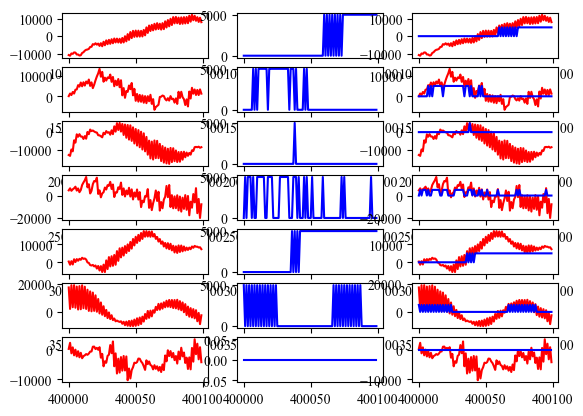

In [9]:
start = [100000,150000,200000,250000,300000,350000,400000]
compareFragments(sample_cut,value*result_array,start,100)

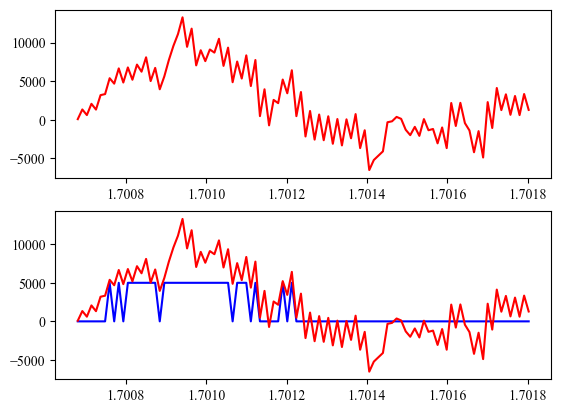

In [17]:
start = 150000
plt.subplot(2,1,1)
plt.plot(time[start:start+100],sample_cut[start:start+100],'r-')
plt.subplot(2,1,2)
plt.plot(time[start:start+100],value*result_array[start:start+100],'b-')
plt.plot(time[start:start+100],sample_cut[start:start+100],'r-')

判决频谱变化

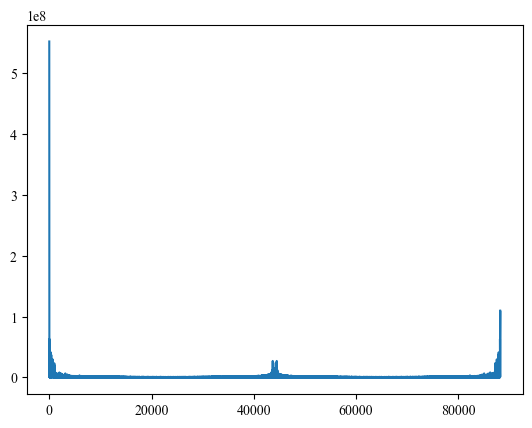

In [11]:
fft_threshold = np.fft.fft(value*result_array)  # 这里注意乘一个判决门限
freq = np.arange(0, len(result_array)) / len(result_array) * 2* sample_rate
plt.plot(freq,np.abs(fft_threshold))

Spectrogram

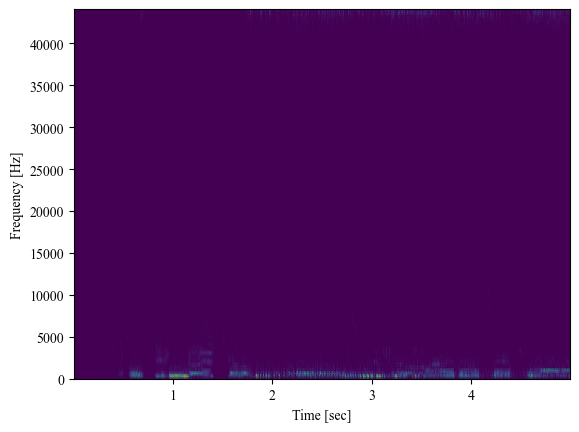

In [12]:
f, t, Sxx = sp.signal.spectrogram(value*result_array, 2*sample_rate)

plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## 播放测试

In [13]:
from pydub.playback import play

sound_dis = AudioSegment(
    data=result_array[60 * sample_rate * 2:65 * sample_rate * 2]*30000,  
    # 这里准确来说输入byte数据才行（int16也行）
    # 这个会根据byte数据的数组长度进行一个判断，使用int16补上几个数据就行
    sample_width=2,
    frame_rate=sample_rate,
    channels=2
)

# play(sound_dis)